<a href="https://colab.research.google.com/github/skywalker0803r/Letter-of-Credit-Intelligent-Auxiliary-Semantic-Analysis-System/blob/main/notebook/%E4%B8%80%E7%A8%AE%E6%96%B0%E7%9A%84%E6%96%87%E6%9C%AC%E6%AF%94%E5%B0%8D%E7%AE%97%E6%B3%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 導入算法

In [2]:
import requests
url = 'https://gist.githubusercontent.com/skywalker0803r/cc188dc34cb244c5b199ebce62d29ba7/raw/391a868e867bbcf706bdc6e445dbaace05f57892/rawtext2img.py'
exec(requests.get(url).text)

# database

In [21]:
import pandas as pd
import re
path = '../data\對應表\EXPNO對應表.csv'
data = pd.read_csv(path)
def preprocess_45(x):
    x = str(x).upper() # 轉大寫字串
    x = re.sub('[\u4e00-\u9fa5]', '', x) # 去除中文
    x = re.sub(r'[^\w\s]','',x) # 去除標點符號
    x = x.replace('\n', '').replace('\r', '').replace('\t', '') # 換行符號去除
    str.strip(x) # 移除左右空白
    return str(x)
data_45 = data['45A'].apply(lambda x:preprocess_45(x)[:50])
data_45

0       MASS PVC RESIN B57QUANTITY 175 MT AT 1300 USDM...
1       PHTHALIC ANHYDRIDE PAQUANTITY  306 MT UNIT PRI...
2        COMMODITY LLDPE TAISOX 3470 QUANTITY 320MT 2F...
3       COMMODITY                                     ...
4       COMMODITY                                     ...
                              ...                        
8226    CFR KOBE JAPANVISCOSE RAYON STAPLE FIBER15DX40...
8227    CFR KOBE JAPANVISCOSE RAYON STAPLE FIBER15DX40...
8228    CFR KOBE JAPANVISCOSE RAYON STAPLE FIBER15DX40...
8229    187 MT PVC RESIN SUSPENSION GRADE S65D OF FORM...
8230    7000 MT IN 4X20 FT CONTAINERSPVC RESIN S60AS P...
Name: 45A, Length: 8231, dtype: object

50000


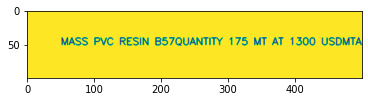

50000


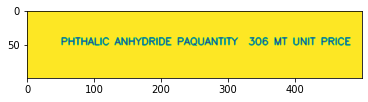

50000


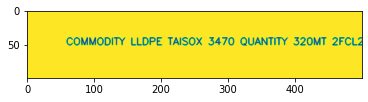

50000


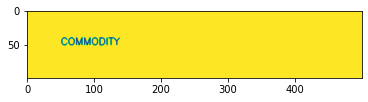

50000


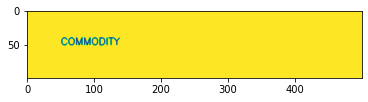

In [23]:
import matplotlib.pyplot as plt
n = 5
for i in range(n):
    img = rawtext2img(data_45.values[i])
    print(img.shape[0]*img.shape[1])
    plt.imshow(img[:,:,0])
    plt.show()

# 然後把這些圖片做autoencoder

# 利用encoder的向量丟入例如knn之類的相似度搜索算法